In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df = df.astype(float)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df['Y'] = data.target
df['Y'] = df.Y.replace(dict(enumerate(data.target_names)))
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
Y = pd.get_dummies(df['Y'], prefix = 'Y')
Y

,Y_setosa,Y_versicolor,Y_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [6]:
df = pd.concat([df, Y], axis = 1)
df.drop(['Y'], axis = 1, inplace = True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y_setosa,Y_versicolor,Y_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [7]:
X_data = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X_data = np.asarray(X_data)
Y_data = df[['Y_setosa', 'Y_versicolor', 'Y_virginica']]
Y_data = np.asarray(Y_data)

In [8]:
X_data.shape, Y_data.shape

((150, 4), (150, 3))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [10]:
m = Sequential()
m.add(Dense(64, input_shape = (4, ), activation = 'relu'))
m.add(Dense(128, activation = 'relu'))
m.add(Dense(128, activation = 'relu'))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(3, activation = 'softmax'))
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 37,763
Trainable params: 37,763
Non-trainable params: 0
____________________________________________________

In [11]:
t_x, tt_x, t_y, tt_y = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 1)

In [12]:
t_x.shape  # 확인하고 배치사이즈 조정

(120, 4)

In [13]:
m.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hy = m.fit(t_x, t_y, validation_split = 0.2, batch_size = 40, epochs = 1000)

Epoch 1/1000
3/3 [==============================] - 1s 104ms/step - loss: 1.0696 - accuracy: 0.3542 - val_loss: 0.9720 - val_accuracy: 0.5417
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.9108 - accuracy: 0.7292 - val_loss: 0.9132 - val_accuracy: 0.5417
Epoch 3/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.8051 - accuracy: 0.7292 - val_loss: 0.8197 - val_accuracy: 0.5417
Epoch 4/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.6970 - accuracy: 0.7292 - val_loss: 0.7365 - val_accuracy: 0.5417
Epoch 5/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.6083 - accuracy: 0.7292 - val_loss: 0.6723 - val_accuracy: 0.5417
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.5197 - accuracy: 0.7292 - val_loss: 0.6026 - val_accuracy: 0.5417
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4556 - accuracy: 0.7292 - val_loss: 0.5328 - val_accuracy: 0.5417
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.0859 - accuracy: 0.9792 - val_loss: 0.1213 - val_accuracy: 0.9167
Epoch 60/1000
3/3 [==============================] - 0s 39ms/step - loss: 0.0626 - accuracy: 0.9792 - val_loss: 0.1163 - val_accuracy: 0.9167
Epoch 61/1000
3/3 [==============================] - 0s 35ms/step - loss: 0.0844 - accuracy: 0.9583 - val_loss: 0.1060 - val_accuracy: 0.9583
Epoch 62/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0668 - accuracy: 0.9792 - val_loss: 0.1822 - val_accuracy: 0.9167
Epoch 63/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0866 - accuracy: 0.9792 - val_loss: 0.1051 - val_accuracy: 0.9583
Epoch 64/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0849 - accuracy: 0.9583 - val_loss: 0.2241 - val_accuracy: 0.9167
Epoch 65/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1283 - accuracy: 0.9479 - val_loss: 0.1816 - val_accuracy: 0.9167
Epoch 

3/3 [==============================] - 0s 17ms/step - loss: 0.0626 - accuracy: 0.9688 - val_loss: 0.1272 - val_accuracy: 0.9167
Epoch 117/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0553 - accuracy: 0.9792 - val_loss: 0.1217 - val_accuracy: 0.9167
Epoch 118/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0564 - accuracy: 0.9792 - val_loss: 0.1399 - val_accuracy: 0.9167
Epoch 119/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0533 - accuracy: 0.9896 - val_loss: 0.1347 - val_accuracy: 0.9167
Epoch 120/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0511 - accuracy: 0.9792 - val_loss: 0.1214 - val_accuracy: 0.9167
Epoch 121/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0579 - accuracy: 0.9792 - val_loss: 0.1241 - val_accuracy: 0.9167
Epoch 122/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0601 - accuracy: 0.9896 - val_loss: 0.1699 - val_accuracy: 0.9167
Epoch 123/1000

3/3 [==============================] - 0s 12ms/step - loss: 0.0436 - accuracy: 0.9688 - val_loss: 0.2744 - val_accuracy: 0.9167
Epoch 174/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0557 - accuracy: 0.9896 - val_loss: 0.1613 - val_accuracy: 0.8333
Epoch 175/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.0425 - accuracy: 0.9792 - val_loss: 0.2176 - val_accuracy: 0.9167
Epoch 176/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0431 - accuracy: 0.9896 - val_loss: 0.1965 - val_accuracy: 0.9167
Epoch 177/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0491 - accuracy: 0.9792 - val_loss: 0.1799 - val_accuracy: 0.9167
Epoch 178/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0429 - accuracy: 0.9896 - val_loss: 0.2406 - val_accuracy: 0.9167
Epoch 179/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0391 - accuracy: 0.9896 - val_loss: 0.1616 - val_accuracy: 0.8333
Epoch 180/1000

3/3 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.9896 - val_loss: 0.2201 - val_accuracy: 0.9167
Epoch 231/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0410 - accuracy: 0.9896 - val_loss: 0.2006 - val_accuracy: 0.8750
Epoch 232/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.9896 - val_loss: 0.2251 - val_accuracy: 0.9167
Epoch 233/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.9896 - val_loss: 0.2379 - val_accuracy: 0.9167
Epoch 234/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 0.2817 - val_accuracy: 0.9167
Epoch 235/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.9896 - val_loss: 0.3233 - val_accuracy: 0.9167
Epoch 236/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0360 - accuracy: 0.9896 - val_loss: 0.2230 - val_accuracy: 0.9167
Epoch 237/1000

3/3 [==============================] - 0s 12ms/step - loss: 0.0251 - accuracy: 0.9896 - val_loss: 0.3800 - val_accuracy: 0.9167
Epoch 288/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0238 - accuracy: 0.9896 - val_loss: 0.3723 - val_accuracy: 0.9167
Epoch 289/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0238 - accuracy: 0.9896 - val_loss: 0.4452 - val_accuracy: 0.9167
Epoch 290/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0226 - accuracy: 0.9896 - val_loss: 0.4520 - val_accuracy: 0.9167
Epoch 291/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0249 - accuracy: 0.9896 - val_loss: 0.3974 - val_accuracy: 0.9167
Epoch 292/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0243 - accuracy: 0.9896 - val_loss: 0.4223 - val_accuracy: 0.9167
Epoch 293/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0261 - accuracy: 0.9896 - val_loss: 0.4536 - val_accuracy: 0.9167
Epoch 294/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.9896 - val_loss: 0.4032 - val_accuracy: 0.8750
Epoch 345/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0264 - accuracy: 0.9896 - val_loss: 0.3234 - val_accuracy: 0.8333
Epoch 346/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0394 - accuracy: 0.9792 - val_loss: 0.3744 - val_accuracy: 0.8750
Epoch 347/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0261 - accuracy: 0.9896 - val_loss: 0.5224 - val_accuracy: 0.8750
Epoch 348/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0411 - accuracy: 0.9792 - val_loss: 0.6297 - val_accuracy: 0.8333
Epoch 349/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0297 - accuracy: 0.9896 - val_loss: 0.3488 - val_accuracy: 0.8750
Epoch 350/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0408 - accuracy: 0.9792 - val_loss: 0.3055 - val_accuracy: 0.8333
Epoch 351/1000

3/3 [==============================] - 0s 156ms/step - loss: 0.0178 - accuracy: 0.9896 - val_loss: 0.5919 - val_accuracy: 0.8333
Epoch 402/1000
3/3 [==============================] - 0s 64ms/step - loss: 0.0133 - accuracy: 0.9896 - val_loss: 0.7174 - val_accuracy: 0.8750
Epoch 403/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 0.6900 - val_accuracy: 0.8750
Epoch 404/1000
3/3 [==============================] - 0s 79ms/step - loss: 0.0136 - accuracy: 0.9896 - val_loss: 0.6236 - val_accuracy: 0.8333
Epoch 405/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.7277 - val_accuracy: 0.8750
Epoch 406/1000
3/3 [==============================] - 0s 50ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.6780 - val_accuracy: 0.8333
Epoch 407/1000
3/3 [==============================] - 0s 37ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.6285 - val_accuracy: 0.8333
Epoch 408/100

3/3 [==============================] - 0s 12ms/step - loss: 0.1215 - accuracy: 0.9792 - val_loss: 0.4047 - val_accuracy: 0.8333
Epoch 459/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0541 - accuracy: 0.9792 - val_loss: 0.6214 - val_accuracy: 0.8750
Epoch 460/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.9792 - val_loss: 0.7173 - val_accuracy: 0.8333
Epoch 461/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9792 - val_loss: 0.4224 - val_accuracy: 0.8750
Epoch 462/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0490 - accuracy: 0.9792 - val_loss: 0.3856 - val_accuracy: 0.8333
Epoch 463/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0509 - accuracy: 0.9792 - val_loss: 0.4479 - val_accuracy: 0.8750
Epoch 464/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0250 - accuracy: 0.9896 - val_loss: 0.6816 - val_accuracy: 0.8333
Epoch 465/1000

3/3 [==============================] - 0s 18ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.8198 - val_accuracy: 0.8333
Epoch 516/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0109 - accuracy: 0.9896 - val_loss: 0.8571 - val_accuracy: 0.8333
Epoch 517/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.0591 - val_accuracy: 0.8333
Epoch 518/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.8733 - val_accuracy: 0.8333
Epoch 519/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.8412 - val_accuracy: 0.8333
Epoch 520/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.0460 - val_accuracy: 0.8333
Epoch 521/1000
3/3 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 1.00 - 0s 22ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.

3/3 [==============================] - 0s 17ms/step - loss: 0.0588 - accuracy: 0.9792 - val_loss: 0.2153 - val_accuracy: 0.9167
Epoch 573/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0554 - accuracy: 0.9792 - val_loss: 0.2053 - val_accuracy: 0.9167
Epoch 574/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0509 - accuracy: 0.9792 - val_loss: 0.2332 - val_accuracy: 0.8333
Epoch 575/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0450 - accuracy: 0.9896 - val_loss: 0.2887 - val_accuracy: 0.8750
Epoch 576/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0432 - accuracy: 0.9896 - val_loss: 0.3305 - val_accuracy: 0.8750
Epoch 577/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0417 - accuracy: 0.9896 - val_loss: 0.3377 - val_accuracy: 0.8750
Epoch 578/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0387 - accuracy: 0.9896 - val_loss: 0.3511 - val_accuracy: 0.8750
Epoch 579/1000

3/3 [==============================] - 0s 17ms/step - loss: 0.0471 - accuracy: 0.9792 - val_loss: 0.3315 - val_accuracy: 0.8333
Epoch 630/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0614 - accuracy: 0.9792 - val_loss: 0.3412 - val_accuracy: 0.8333
Epoch 631/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0472 - accuracy: 0.9792 - val_loss: 0.4132 - val_accuracy: 0.8750
Epoch 632/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0284 - accuracy: 0.9792 - val_loss: 0.5449 - val_accuracy: 0.8750
Epoch 633/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.6290 - val_accuracy: 0.8750
Epoch 634/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.5868 - val_accuracy: 0.8750
Epoch 635/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0265 - accuracy: 1.0000 - val_loss: 0.5063 - val_accuracy: 0.8750
Epoch 636/1000

3/3 [==============================] - 0s 21ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1176 - val_accuracy: 0.8750
Epoch 687/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0974 - val_accuracy: 0.8750
Epoch 688/1000
3/3 [==============================] - 0s 40ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.0670 - val_accuracy: 0.8750
Epoch 689/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0786 - val_accuracy: 0.8750
Epoch 690/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0692 - val_accuracy: 0.8750
Epoch 691/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.0728 - val_accuracy: 0.8750
Epoch 692/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.0838 - val_accuracy: 0.8750
Epoch 693/1000

3/3 [==============================] - 0s 31ms/step - loss: 4.6272e-04 - accuracy: 1.0000 - val_loss: 1.2830 - val_accuracy: 0.8750
Epoch 743/1000
3/3 [==============================] - 0s 30ms/step - loss: 4.4280e-04 - accuracy: 1.0000 - val_loss: 1.2695 - val_accuracy: 0.8750
Epoch 744/1000
3/3 [==============================] - 0s 35ms/step - loss: 5.5612e-04 - accuracy: 1.0000 - val_loss: 1.2512 - val_accuracy: 0.8750
Epoch 745/1000
3/3 [==============================] - 0s 29ms/step - loss: 4.3034e-04 - accuracy: 1.0000 - val_loss: 1.2809 - val_accuracy: 0.8750
Epoch 746/1000
3/3 [==============================] - 0s 21ms/step - loss: 4.6635e-04 - accuracy: 1.0000 - val_loss: 1.2996 - val_accuracy: 0.8750
Epoch 747/1000
3/3 [==============================] - 0s 39ms/step - loss: 4.5760e-04 - accuracy: 1.0000 - val_loss: 1.2891 - val_accuracy: 0.8750
Epoch 748/1000
3/3 [==============================] - 0s 61ms/step - loss: 4.0635e-04 - accuracy: 1.0000 - val_loss: 1.2751 - val_acc

Epoch 798/1000
3/3 [==============================] - 0s 19ms/step - loss: 2.3823e-04 - accuracy: 1.0000 - val_loss: 1.3576 - val_accuracy: 0.8750
Epoch 799/1000
3/3 [==============================] - 0s 20ms/step - loss: 2.8673e-04 - accuracy: 1.0000 - val_loss: 1.3542 - val_accuracy: 0.8750
Epoch 800/1000
3/3 [==============================] - 0s 16ms/step - loss: 2.7247e-04 - accuracy: 1.0000 - val_loss: 1.3725 - val_accuracy: 0.8750
Epoch 801/1000
3/3 [==============================] - 0s 24ms/step - loss: 2.6368e-04 - accuracy: 1.0000 - val_loss: 1.4231 - val_accuracy: 0.8750
Epoch 802/1000
3/3 [==============================] - 0s 22ms/step - loss: 2.7917e-04 - accuracy: 1.0000 - val_loss: 1.4377 - val_accuracy: 0.8750
Epoch 803/1000
3/3 [==============================] - 0s 13ms/step - loss: 3.3969e-04 - accuracy: 1.0000 - val_loss: 1.4285 - val_accuracy: 0.8750
Epoch 804/1000
3/3 [==============================] - 0s 12ms/step - loss: 3.0020e-04 - accuracy: 1.0000 - val_loss: 1

Epoch 854/1000
3/3 [==============================] - 0s 12ms/step - loss: 1.2713e-04 - accuracy: 1.0000 - val_loss: 1.4472 - val_accuracy: 0.8750
Epoch 855/1000
3/3 [==============================] - 0s 15ms/step - loss: 1.8722e-04 - accuracy: 1.0000 - val_loss: 1.4302 - val_accuracy: 0.8750
Epoch 856/1000
3/3 [==============================] - 0s 12ms/step - loss: 2.1673e-04 - accuracy: 1.0000 - val_loss: 1.4353 - val_accuracy: 0.8750
Epoch 857/1000
3/3 [==============================] - 0s 11ms/step - loss: 1.9400e-04 - accuracy: 1.0000 - val_loss: 1.4609 - val_accuracy: 0.8750
Epoch 858/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.3022e-04 - accuracy: 1.0000 - val_loss: 1.4801 - val_accuracy: 0.8750
Epoch 859/1000
3/3 [==============================] - 0s 12ms/step - loss: 1.3340e-04 - accuracy: 1.0000 - val_loss: 1.4999 - val_accuracy: 0.8750
Epoch 860/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.6688e-04 - accuracy: 1.0000 - val_loss: 1

Epoch 910/1000
3/3 [==============================] - 0s 11ms/step - loss: 1.0049e-04 - accuracy: 1.0000 - val_loss: 1.5271 - val_accuracy: 0.8750
Epoch 911/1000
3/3 [==============================] - 0s 12ms/step - loss: 9.6498e-05 - accuracy: 1.0000 - val_loss: 1.5308 - val_accuracy: 0.8750
Epoch 912/1000
3/3 [==============================] - 0s 12ms/step - loss: 9.5889e-05 - accuracy: 1.0000 - val_loss: 1.5338 - val_accuracy: 0.8750
Epoch 913/1000
3/3 [==============================] - 0s 11ms/step - loss: 9.7320e-05 - accuracy: 1.0000 - val_loss: 1.5364 - val_accuracy: 0.8750
Epoch 914/1000
3/3 [==============================] - 0s 13ms/step - loss: 9.3951e-05 - accuracy: 1.0000 - val_loss: 1.5434 - val_accuracy: 0.8750
Epoch 915/1000
3/3 [==============================] - 0s 15ms/step - loss: 9.9238e-05 - accuracy: 1.0000 - val_loss: 1.5461 - val_accuracy: 0.8750
Epoch 916/1000
3/3 [==============================] - 0s 11ms/step - loss: 9.5731e-05 - accuracy: 1.0000 - val_loss: 1

Epoch 966/1000
3/3 [==============================] - 0s 11ms/step - loss: 7.9178e-05 - accuracy: 1.0000 - val_loss: 1.5834 - val_accuracy: 0.8750
Epoch 967/1000
3/3 [==============================] - 0s 10ms/step - loss: 7.0168e-05 - accuracy: 1.0000 - val_loss: 1.5843 - val_accuracy: 0.8750
Epoch 968/1000
3/3 [==============================] - 0s 9ms/step - loss: 6.9688e-05 - accuracy: 1.0000 - val_loss: 1.5868 - val_accuracy: 0.8750
Epoch 969/1000
3/3 [==============================] - 0s 10ms/step - loss: 7.1170e-05 - accuracy: 1.0000 - val_loss: 1.5898 - val_accuracy: 0.8750
Epoch 970/1000
3/3 [==============================] - 0s 9ms/step - loss: 7.1660e-05 - accuracy: 1.0000 - val_loss: 1.5896 - val_accuracy: 0.8750
Epoch 971/1000
3/3 [==============================] - 0s 12ms/step - loss: 7.2787e-05 - accuracy: 1.0000 - val_loss: 1.5796 - val_accuracy: 0.8750
Epoch 972/1000
3/3 [==============================] - 0s 13ms/step - loss: 6.9912e-05 - accuracy: 1.0000 - val_loss: 1.5

In [14]:
import matplotlib.pyplot as plt

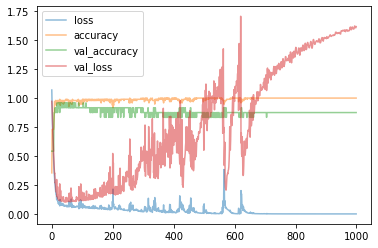

In [15]:
plt.plot(hy.history['loss'], label = 'loss', alpha = 0.5)
plt.plot(hy.history['accuracy'], label = 'accuracy', alpha = 0.5)
plt.plot(hy.history['val_accuracy'], label = 'val_accuracy', alpha = 0.5)
plt.plot(hy.history['val_loss'], label = 'val_loss', alpha = 0.5)
plt.legend()
plt.show()

In [16]:
m.evaluate(tt_x, tt_y)

1/1 [==============================] - 0s 16ms/step - loss: 0.7460 - accuracy: 0.9333


[0.7459545731544495, 0.9333333373069763]

In [17]:
from tensorflow.keras.initializers import RandomNormal, Constant
m2 = Sequential()
m2.add(Dense(64, input_shape = (4, ), activation = 'relu'))
m2.add(BatchNormalization())
m2.add(Dense(128, activation = 'relu'))
m2.add(BatchNormalization())
m2.add(Dense(128, activation = 'relu'))
m2.add(BatchNormalization())
m2.add(Dense(64, activation = 'relu'))
m2.add(BatchNormalization())
m2.add(Dense(64, activation = 'relu'))
m2.add(BatchNormalization(momentum = 0.95, epsilon = 0.005, beta_initializer = RandomNormal(mean = 0.0, stddev = 0.05), 
                          gamma_initializer = Constant(value = 0.9)))
m2.add(Dense(3, activation = 'softmax'))
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [18]:
m2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
hy2 = m2.fit(t_x, t_y, validation_split = 0.2, batch_size = 40, epochs = 1000)

Epoch 1/1000
3/3 [==============================] - 1s 104ms/step - loss: 1.2126 - accuracy: 0.5000 - val_loss: 1.2246 - val_accuracy: 0.5417
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.2382 - accuracy: 0.9583 - val_loss: 1.2395 - val_accuracy: 0.5417
Epoch 3/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.1114 - accuracy: 0.9896 - val_loss: 1.2359 - val_accuracy: 0.5417
Epoch 4/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0868 - accuracy: 0.9792 - val_loss: 1.2399 - val_accuracy: 0.5417
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0716 - accuracy: 0.9896 - val_loss: 1.2436 - val_accuracy: 0.5417
Epoch 6/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0534 - accuracy: 0.9792 - val_loss: 1.2404 - val_accuracy: 0.5417
Epoch 7/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0481 - accuracy: 0.9896 - val_loss: 1.2334 - val_accuracy: 0.5417
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.3170 - val_accuracy: 0.8750
Epoch 60/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.3476 - val_accuracy: 0.8750
Epoch 61/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.3619 - val_accuracy: 0.8333
Epoch 62/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.3504 - val_accuracy: 0.8333
Epoch 63/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0513 - accuracy: 0.9792 - val_loss: 0.3288 - val_accuracy: 0.8333
Epoch 64/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.3007 - val_accuracy: 0.8750
Epoch 65/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.2596 - val_accuracy: 0.9167
Epoch 

3/3 [==============================] - 0s 13ms/step - loss: 0.0131 - accuracy: 0.9896 - val_loss: 0.1212 - val_accuracy: 0.9583
Epoch 117/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0557 - accuracy: 0.9688 - val_loss: 0.1379 - val_accuracy: 0.9583
Epoch 118/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0774 - accuracy: 0.9792 - val_loss: 0.2397 - val_accuracy: 0.9167
Epoch 119/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.9896 - val_loss: 0.5370 - val_accuracy: 0.8333
Epoch 120/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0243 - accuracy: 0.9896 - val_loss: 0.7612 - val_accuracy: 0.7917
Epoch 121/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0630 - accuracy: 0.9688 - val_loss: 0.8521 - val_accuracy: 0.7500
Epoch 122/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.8581 - val_accuracy: 0.7500
Epoch 123/1000

3/3 [==============================] - 0s 33ms/step - loss: 0.0166 - accuracy: 0.9896 - val_loss: 0.4102 - val_accuracy: 0.8333
Epoch 174/1000
3/3 [==============================] - 0s 145ms/step - loss: 0.0183 - accuracy: 0.9896 - val_loss: 0.5046 - val_accuracy: 0.8333
Epoch 175/1000
3/3 [==============================] - 0s 63ms/step - loss: 0.0304 - accuracy: 0.9896 - val_loss: 0.5136 - val_accuracy: 0.7917
Epoch 176/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.0279 - accuracy: 0.9896 - val_loss: 0.4864 - val_accuracy: 0.7917
Epoch 177/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0524 - accuracy: 0.9792 - val_loss: 0.4201 - val_accuracy: 0.8333
Epoch 178/1000
3/3 [==============================] - 0s 65ms/step - loss: 0.0228 - accuracy: 0.9896 - val_loss: 0.3883 - val_accuracy: 0.8750
Epoch 179/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.3933 - val_accuracy: 0.8333
Epoch 180/100

3/3 [==============================] - 0s 12ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.2045 - val_accuracy: 0.8750
Epoch 231/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.1938 - val_accuracy: 0.8750
Epoch 232/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.1748 - val_accuracy: 0.9167
Epoch 233/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1639 - val_accuracy: 0.9167
Epoch 234/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0308 - accuracy: 0.9896 - val_loss: 0.1709 - val_accuracy: 0.9167
Epoch 235/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1785 - val_accuracy: 0.9167
Epoch 236/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1841 - val_accuracy: 0.9167
Epoch 237/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1630 - val_accuracy: 0.9583
Epoch 288/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.1552 - val_accuracy: 0.9583
Epoch 289/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1624 - val_accuracy: 0.9583
Epoch 290/1000
3/3 [==============================] - 0s 47ms/step - loss: 0.0262 - accuracy: 0.9896 - val_loss: 0.1690 - val_accuracy: 0.9583
Epoch 291/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.1605 - val_accuracy: 0.9583
Epoch 292/1000
3/3 [==============================] - 0s 42ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.1365 - val_accuracy: 0.9583
Epoch 293/1000
3/3 [==============================] - 0s 29ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.1267 - val_accuracy: 0.9583
Epoch 294/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.0238 - accuracy: 0.9896 - val_loss: 0.1960 - val_accuracy: 0.9167
Epoch 345/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.2355 - val_accuracy: 0.9167
Epoch 346/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0246 - accuracy: 0.9896 - val_loss: 0.2633 - val_accuracy: 0.9167
Epoch 347/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0205 - accuracy: 0.9896 - val_loss: 0.2637 - val_accuracy: 0.9167
Epoch 348/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2498 - val_accuracy: 0.9167
Epoch 349/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.2281 - val_accuracy: 0.9167
Epoch 350/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0186 - accuracy: 0.9896 - val_loss: 0.2081 - val_accuracy: 0.9167
Epoch 351/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9167
Epoch 402/1000
3/3 [==============================] - 0s 34ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1594 - val_accuracy: 0.9167
Epoch 403/1000
3/3 [==============================] - 0s 30ms/step - loss: 0.0397 - accuracy: 0.9896 - val_loss: 0.1964 - val_accuracy: 0.8750
Epoch 404/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.2662 - val_accuracy: 0.8750
Epoch 405/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0354 - accuracy: 0.9896 - val_loss: 0.3043 - val_accuracy: 0.8750
Epoch 406/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0245 - accuracy: 0.9896 - val_loss: 0.3027 - val_accuracy: 0.8750
Epoch 407/1000
3/3 [==============================] - 0s 33ms/step - loss: 0.0707 - accuracy: 0.9688 - val_loss: 0.2435 - val_accuracy: 0.9167
Epoch 408/1000

3/3 [==============================] - 0s 13ms/step - loss: 0.0676 - accuracy: 0.9792 - val_loss: 0.3359 - val_accuracy: 0.8750
Epoch 459/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.2576 - val_accuracy: 0.9167
Epoch 460/1000
3/3 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.00 - 0s 11ms/step - loss: 0.0117 - accuracy: 0.9896 - val_loss: 0.2722 - val_accuracy: 0.8750
Epoch 461/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3323 - val_accuracy: 0.8750
Epoch 462/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0490 - accuracy: 0.9896 - val_loss: 0.3840 - val_accuracy: 0.8750
Epoch 463/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.8750
Epoch 464/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.

Epoch 515/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.2058 - val_accuracy: 0.9167
Epoch 516/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2254 - val_accuracy: 0.9167
Epoch 517/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2427 - val_accuracy: 0.9167
Epoch 518/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.2577 - val_accuracy: 0.9167
Epoch 519/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.2639 - val_accuracy: 0.9167
Epoch 520/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2664 - val_accuracy: 0.9167
Epoch 521/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9167

3/3 [==============================] - 0s 15ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.7118 - val_accuracy: 0.8333
Epoch 573/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.6784 - val_accuracy: 0.8333
Epoch 574/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0535 - accuracy: 0.9896 - val_loss: 0.6486 - val_accuracy: 0.8333
Epoch 575/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.5960 - val_accuracy: 0.8333
Epoch 576/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4857 - val_accuracy: 0.8750
Epoch 577/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.3991 - val_accuracy: 0.8750
Epoch 578/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0129 - accuracy: 0.9896 - val_loss: 0.3274 - val_accuracy: 0.9167
Epoch 579/1000

3/3 [==============================] - 0s 17ms/step - loss: 7.3346e-04 - accuracy: 1.0000 - val_loss: 0.1948 - val_accuracy: 0.9167
Epoch 630/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.2331 - val_accuracy: 0.9167
Epoch 631/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.2799 - val_accuracy: 0.9167
Epoch 632/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0437 - accuracy: 0.9792 - val_loss: 0.2795 - val_accuracy: 0.9167
Epoch 633/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.2744 - val_accuracy: 0.9167
Epoch 634/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.2698 - val_accuracy: 0.9167
Epoch 635/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2672 - val_accuracy: 0.9167
Epoch 636/

3/3 [==============================] - 0s 13ms/step - loss: 0.0180 - accuracy: 0.9896 - val_loss: 0.2002 - val_accuracy: 0.9167
Epoch 687/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0895 - val_accuracy: 0.9583
Epoch 688/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0664 - val_accuracy: 0.9583
Epoch 689/1000
3/3 [==============================] - ETA: 0s - loss: 9.2931e-04 - accuracy: 1.00 - 0s 32ms/step - loss: 0.1074 - accuracy: 0.9896 - val_loss: 0.1042 - val_accuracy: 0.9583
Epoch 690/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.1650 - val_accuracy: 0.9167
Epoch 691/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0109 - accuracy: 0.9896 - val_loss: 0.2881 - val_accuracy: 0.9167
Epoch 692/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss

Epoch 743/1000
3/3 [==============================] - 0s 45ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9583
Epoch 744/1000
3/3 [==============================] - 0s 44ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 0.1031 - val_accuracy: 0.9583
Epoch 745/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1379 - val_accuracy: 0.9583
Epoch 746/1000
3/3 [==============================] - 0s 41ms/step - loss: 0.0218 - accuracy: 0.9792 - val_loss: 0.1474 - val_accuracy: 0.9583
Epoch 747/1000
3/3 [==============================] - 0s 51ms/step - loss: 0.1344 - accuracy: 0.9583 - val_loss: 0.0841 - val_accuracy: 0.9583
Epoch 748/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0675 - val_accuracy: 0.9583
Epoch 749/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0126 - accuracy: 0.9896 - val_loss: 0.1589 - val_accuracy: 0.9583

3/3 [==============================] - 0s 13ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 0.9583
Epoch 801/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0340 - accuracy: 0.9792 - val_loss: 0.0862 - val_accuracy: 0.9583
Epoch 802/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0308 - accuracy: 0.9896 - val_loss: 0.0913 - val_accuracy: 0.9583
Epoch 803/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9583
Epoch 804/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9167
Epoch 805/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0100 - accuracy: 0.9896 - val_loss: 0.0999 - val_accuracy: 0.9167
Epoch 806/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0982 - val_accuracy: 0.9167
Epoch 807/1000

3/3 [==============================] - 0s 15ms/step - loss: 0.0263 - accuracy: 0.9896 - val_loss: 0.1553 - val_accuracy: 0.9167
Epoch 858/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0309 - accuracy: 0.9792 - val_loss: 0.1238 - val_accuracy: 0.9167
Epoch 859/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0666 - accuracy: 0.9792 - val_loss: 0.1345 - val_accuracy: 0.9583
Epoch 860/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0532 - accuracy: 0.9792 - val_loss: 0.1631 - val_accuracy: 0.9167
Epoch 861/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.9896 - val_loss: 0.1547 - val_accuracy: 0.9167
Epoch 862/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9583
Epoch 863/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 0.9583
Epoch 864/1000

3/3 [==============================] - 0s 13ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2289 - val_accuracy: 0.9583
Epoch 915/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2490 - val_accuracy: 0.9167
Epoch 916/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.3499 - val_accuracy: 0.8750
Epoch 917/1000
3/3 [==============================] - 0s 13ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4583 - val_accuracy: 0.8750
Epoch 918/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5412 - val_accuracy: 0.8750
Epoch 919/1000
3/3 [==============================] - 0s 12ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.5215 - val_accuracy: 0.8750
Epoch 920/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.3566 - val_accuracy: 0.8750
Epoch 921/1000

3/3 [==============================] - 0s 16ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.5453 - val_accuracy: 0.8750
Epoch 972/1000
3/3 [==============================] - 0s 14ms/step - loss: 0.0191 - accuracy: 0.9896 - val_loss: 0.5159 - val_accuracy: 0.8750
Epoch 973/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4643 - val_accuracy: 0.8750
Epoch 974/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0317 - accuracy: 0.9896 - val_loss: 0.4201 - val_accuracy: 0.8750
Epoch 975/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.4036 - val_accuracy: 0.8750
Epoch 976/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4228 - val_accuracy: 0.8750
Epoch 977/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.4195 - val_accuracy: 0.8750
Epoch 978/1000

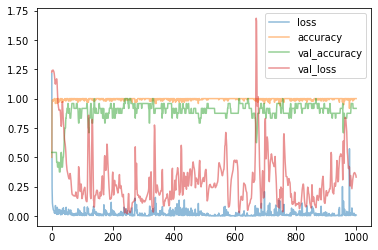

In [19]:
plt.plot(hy2.history['loss'], label = 'loss', alpha = 0.5)
plt.plot(hy2.history['accuracy'], label = 'accuracy', alpha = 0.5)
plt.plot(hy2.history['val_accuracy'], label = 'val_accuracy', alpha = 0.5)
plt.plot(hy2.history['val_loss'], label = 'val_loss', alpha = 0.5)
plt.legend()
plt.show()

In [20]:
m2.evaluate(tt_x, tt_y)

1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - accuracy: 1.0000


[0.003481573425233364, 1.0]